# Diamond_data_Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import math as m
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score,mean_squared_error

In [2]:
def read_data():
    data = pd.read_csv("D:\Data_set\seaborn-data-master\diamonds.csv")
    return data
data = read_data()

In [3]:
print(data.head(4))

   carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63


In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB
None


In [5]:
print(data.dtypes)

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object


In [6]:
data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [7]:
data.columns.value_counts()

carat      1
cut        1
color      1
clarity    1
depth      1
table      1
price      1
x          1
y          1
z          1
dtype: int64

In [8]:
data['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [9]:
data['cut'].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [10]:
data['color'].value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [11]:
print(data.isna().sum())

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64


<Axes: >

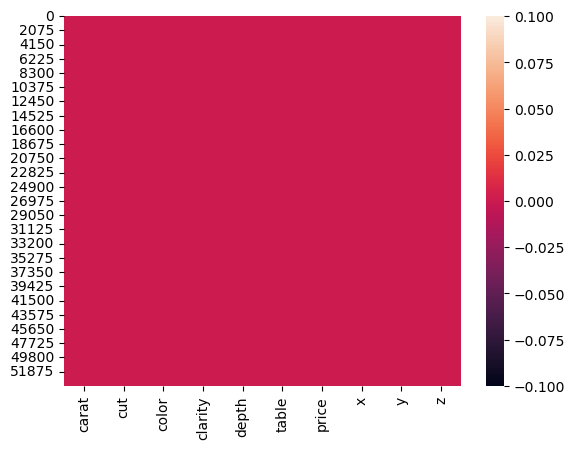

In [12]:
sns.heatmap(data.isnull())

In [13]:
print(data.duplicated().sum())

146


In [14]:
print(data.drop_duplicates(inplace = True))

None


array([[<Axes: title={'center': 'carat'}>,
        <Axes: title={'center': 'depth'}>,
        <Axes: title={'center': 'table'}>],
       [<Axes: title={'center': 'price'}>, <Axes: title={'center': 'x'}>,
        <Axes: title={'center': 'y'}>],
       [<Axes: title={'center': 'z'}>, <Axes: >, <Axes: >]], dtype=object)

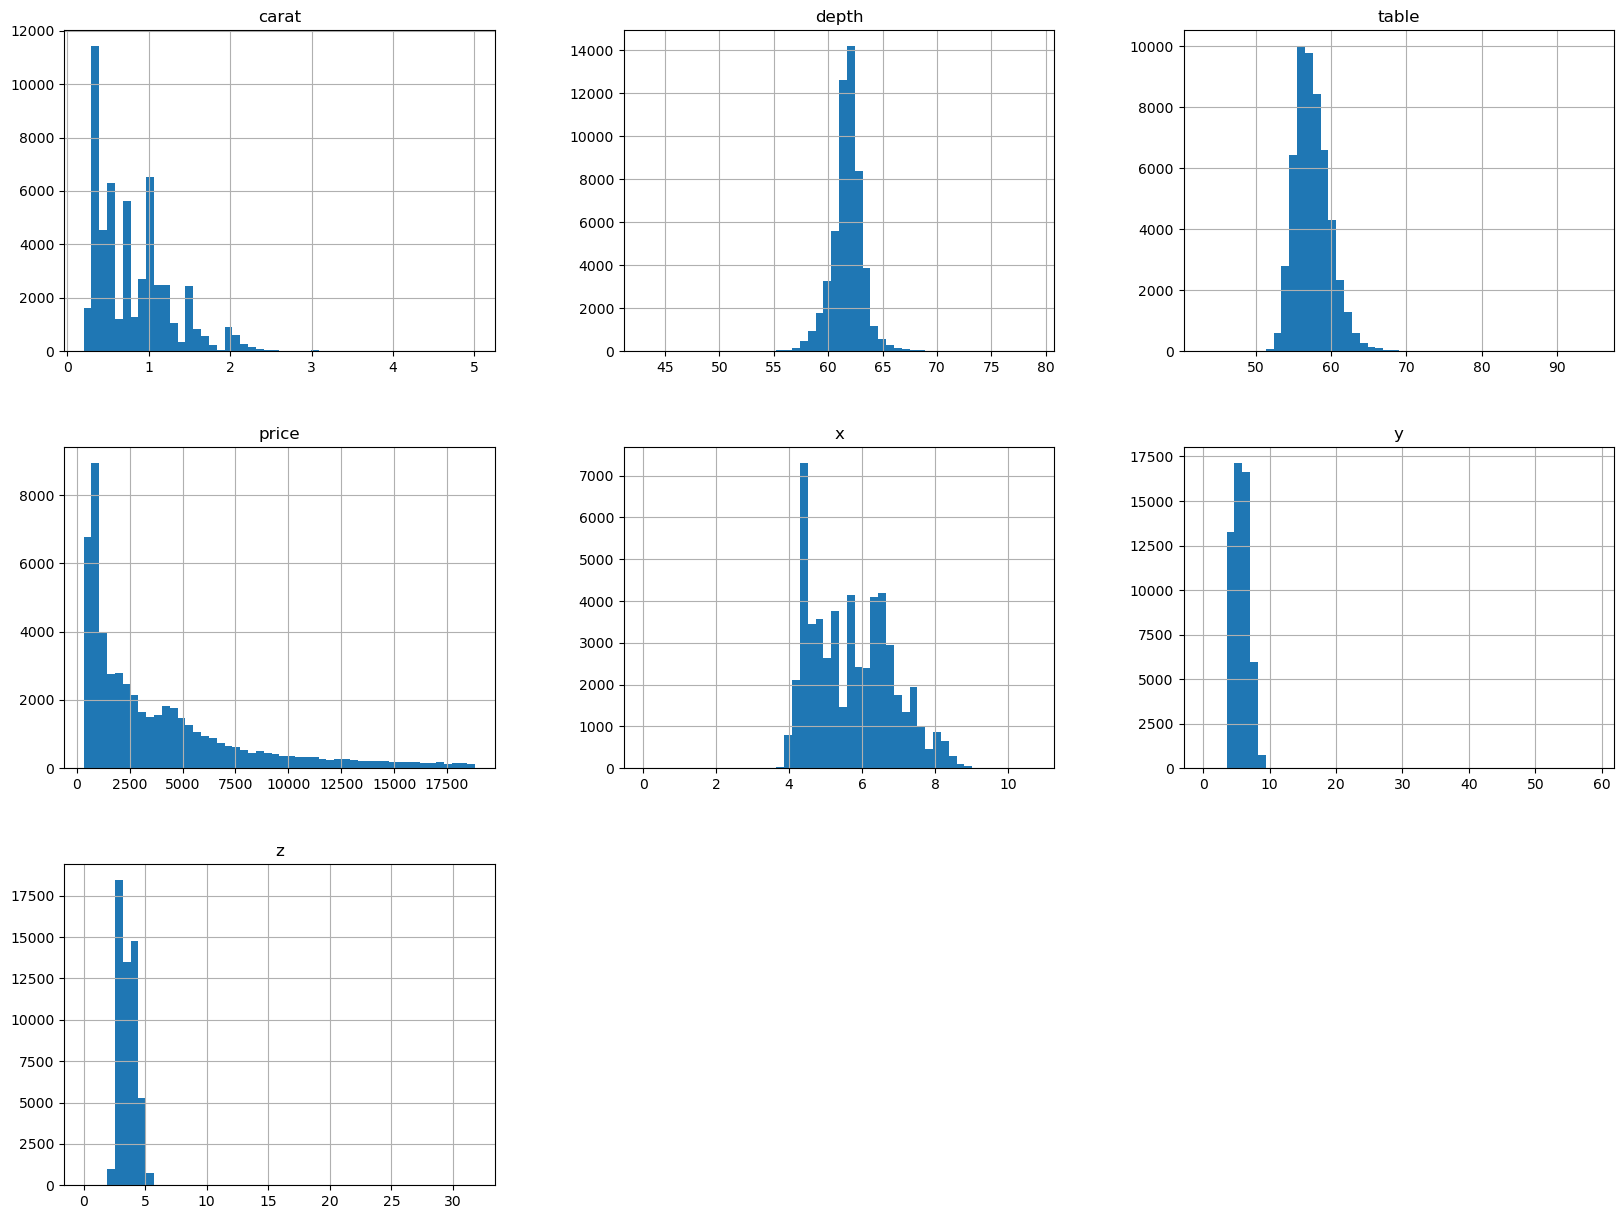

In [15]:
data.hist(bins=50,figsize=(20,15))

In [16]:
data.corr()['price']>0.4  ##  Which will be True we considred those because they are related to price

C:\Users\dell\AppData\Local\Temp\ipykernel_13632\242187873.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()['price']>0.4  ##  Which will be True we considred those because they are related to price


carat     True
depth    False
table    False
price     True
x         True
y         True
z         True
Name: price, dtype: bool

In [17]:
dt = data[['carat','price','x','y','z']]

In [18]:
dt.head()

,carat,price,x,y,z
0,0.23,326,3.95,3.98,2.43
1,0.21,326,3.89,3.84,2.31
2,0.23,327,4.05,4.07,2.31
3,0.29,334,4.20,4.23,2.63
4,0.31,335,4.34,4.35,2.75


In [19]:
x = dt[['carat','x','y','z']]
y = dt['price']

In [20]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.4,random_state=1234)

In [21]:
model = LinearRegression()

In [22]:
model_train = model.fit(x_train,y_train)

In [23]:
pred = model.predict(x_test)

In [24]:
round(r2_score(y_test,pred)*100,2)

85.27